XGBoost Method

In [185]:
import pandas as pd
import numpy as np
from numpy import absolute
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt

In [128]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return

In [129]:
df = pd.read_csv("/content/S_n_I_A_N_P_An_Io_noaa2.txt", header=None, delimiter=r"\s+")
df.columns =['SAM', 'nino', 'ISMR', 'AMO', 'NAO', 'PDO', 'At-nino', 'IOD']
df.drop(columns=['SAM'], inplace=True)
df.head()

,nino,ISMR,AMO,NAO,PDO,At-nino,IOD
0,0.167651,10.24380,0.484010,0.000837,1.084100,0.560382,-0.295856
1,0.212788,44.16110,0.603261,-0.317969,-1.465790,1.189540,-0.032952
2,0.336627,4.76807,0.609364,0.423296,0.114019,0.783738,-0.644708
3,0.575112,-63.58770,0.219494,0.352545,1.807430,0.560395,-0.295477
4,0.647786,12.57720,0.040233,-0.528239,-0.108867,0.727379,0.044719


**For Delay=0**

In [130]:
x = df[['nino', 'AMO', 'NAO', 'PDO', 'At-nino', 'IOD']]
y = df[['ISMR']]

In [131]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [132]:
xg_reg = XGBRegressor(objective ='reg:linear',verbosity = 0, colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(x_train,y_train)
preds = xg_reg.predict(x_test)

In [133]:
rmse = np.sqrt(mse(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 31.402780


In [134]:
data_dmatrix = xgb.DMatrix(data=x,label=y)

In [135]:
params = {"objective":"reg:linear",'verbosity':0, 'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [136]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,32.883751,0.332222,33.099074,0.567725
1,32.343435,0.418983,32.917575,0.506607
2,31.939414,0.449102,32.913971,0.494784
3,31.573237,0.518709,32.880749,0.469308
4,31.333985,0.493644,32.863677,0.503082
5,31.123622,0.495002,32.946616,0.478337
6,30.902558,0.450089,32.945320,0.475212
7,30.621184,0.493883,32.916409,0.496426
8,30.224677,0.555641,32.793188,0.412269
9,29.999061,0.557646,32.783787,0.348868


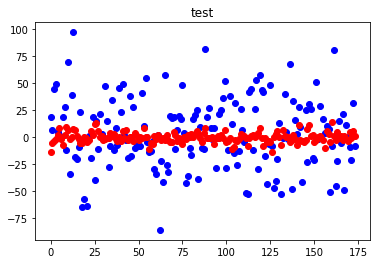

In [137]:
a = list(y_test['ISMR'])
b = list(preds)
plotGraph(a, b, "test")

In [ ]:
data = {'Actual':a,'Predicted':b}
table = pd.DataFrame(data)
table.head()

**For Delay=1**

In [138]:
df_x = df[['nino', 'AMO', 'NAO', 'PDO', 'At-nino', 'IOD']]
df_y = df[['ISMR']]

In [139]:
for i in range(5,870,6):
  df_x.drop(i, axis=0, inplace=True)
  df_y.drop(i-5, axis=0, inplace=True)

  

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [140]:
x_train,x_test,y_train,y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

In [141]:
xg_reg = XGBRegressor(objective ='reg:linear',verbosity = 0, colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(x_train,y_train)
preds = xg_reg.predict(x_test)

In [142]:
rmse = np.sqrt(mse(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 36.691328


In [143]:
data_dmatrix = xgb.DMatrix(data=df_x,label=df_y)

In [144]:
params = {"objective":"reg:linear",'verbosity':0, 'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [145]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,35.126667,0.987656,35.499255,2.107244
1,34.472768,0.754747,35.313374,2.225744
2,34.101710,0.736133,35.345193,2.213036
3,33.729340,0.819546,35.228570,2.240638
4,33.465289,0.762051,35.296117,2.203173
5,33.162610,0.655654,35.350503,2.202904
6,32.891036,0.605706,35.357259,2.236073
7,32.534449,0.661223,35.247130,2.267669
8,32.041434,0.576609,35.178031,2.344443
9,31.772024,0.573412,35.215161,2.317251


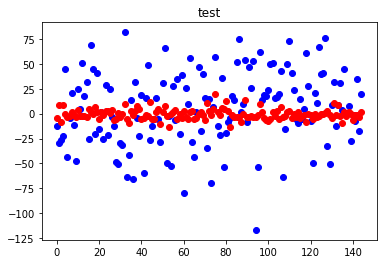

In [146]:
a = list(y_test['ISMR'])
b = list(preds)
plotGraph(a, b, "test")

In [ ]:
data = {'Actual':a,'Predicted':b}
table = pd.DataFrame(data)
table.head()

**For Delay=2**

In [147]:
df_x = df[['nino', 'AMO', 'NAO', 'PDO', 'At-nino', 'IOD']]
df_y = df[['ISMR']]

In [148]:
for i in range(4,870,6):
  df_x.drop([i,i+1], axis=0, inplace=True)
  df_y.drop([i-4,i-3], axis=0, inplace=True)

  

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [149]:
x_train,x_test,y_train,y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

In [150]:
xg_reg = XGBRegressor(objective ='reg:linear',verbosity = 0, colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(x_train,y_train)
preds = xg_reg.predict(x_test)

In [151]:
rmse = np.sqrt(mse(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 32.022654


In [152]:
data_dmatrix = xgb.DMatrix(data=df_x,label=df_y)

In [153]:
params = {"objective":"reg:linear",'verbosity':0, 'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [154]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,34.998606,1.338131,35.276562,2.716605
1,34.490510,1.440139,35.189604,2.739406


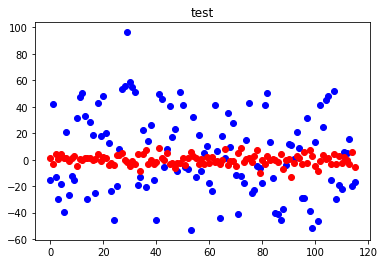

In [155]:
a = list(y_test['ISMR'])
b = list(preds)
plotGraph(a, b, "test")

In [ ]:
data = {'Actual':a,'Predicted':b}
table = pd.DataFrame(data)
table.head()

**For Delay=3**

In [156]:
df_x = df[['nino', 'AMO', 'NAO', 'PDO', 'At-nino', 'IOD']]
df_y = df[['ISMR']]

In [157]:
for i in range(3,870,6):
  df_x.drop([i,i+1,i+2], axis=0, inplace=True)
  df_y.drop([i-3,i-2,i-1], axis=0, inplace=True)

  

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [158]:
x_train,x_test,y_train,y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

In [159]:
xg_reg = XGBRegressor(objective ='reg:linear',verbosity = 0, colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(x_train,y_train)
preds = xg_reg.predict(x_test)

In [160]:
rmse = np.sqrt(mse(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 33.689007


In [161]:
data_dmatrix = xgb.DMatrix(data=df_x,label=df_y)

In [162]:
params = {"objective":"reg:linear",'verbosity':0, 'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [163]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,34.236464,1.135514,34.561654,2.300692
1,33.755262,1.154097,34.523910,2.275235
2,33.347388,1.138663,34.506706,2.282328
3,32.912444,1.101857,34.487926,2.217264


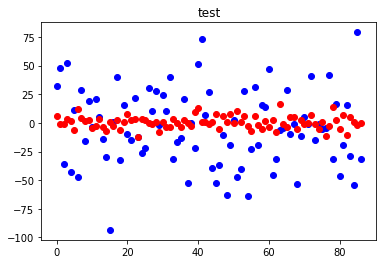

In [164]:
a = list(y_test['ISMR'])
b = list(preds)
plotGraph(a, b, "test")

In [ ]:
data = {'Actual':a,'Predicted':b}
table = pd.DataFrame(data)
table.head()

**For Delay=4**

In [165]:
df_x = df[['nino', 'AMO', 'NAO', 'PDO', 'At-nino', 'IOD']]
df_y = df[['ISMR']]

In [166]:
for i in range(2,870,6):
  df_x.drop([i,i+1,i+2,i+3], axis=0, inplace=True)
  df_y.drop([i-2,i-1,i,i+1], axis=0, inplace=True)

  

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [167]:
x_train,x_test,y_train,y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

In [168]:
xg_reg = XGBRegressor(objective ='reg:linear',verbosity = 0, colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(x_train,y_train)
preds = xg_reg.predict(x_test)

In [169]:
rmse = np.sqrt(mse(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 33.550709


In [170]:
data_dmatrix = xgb.DMatrix(data=df_x,label=df_y)

In [171]:
params = {"objective":"reg:linear",'verbosity':0, 'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [172]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,32.244455,1.111997,32.922376,2.041319
1,31.576551,1.069378,32.851420,2.067892


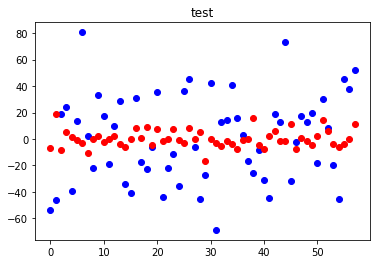

In [173]:
a = list(y_test['ISMR'])
b = list(preds)
plotGraph(a, b, "test")

In [ ]:
data = {'Actual':a,'Predicted':b}
table = pd.DataFrame(data)
table.head()

**For Delay=5**

In [174]:
df_x = df[['nino', 'AMO', 'NAO', 'PDO', 'At-nino', 'IOD']]
df_y = df[['ISMR']]

In [175]:
for i in range(1,870,6):
  df_x.drop([i,i+1,i+2,i+3,i+4], axis=0, inplace=True)
  df_y.drop([i-1,i,i+1,i+2,i+3], axis=0, inplace=True)

  

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [176]:
x_train,x_test,y_train,y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

In [177]:
xg_reg = XGBRegressor(objective ='reg:linear',verbosity = 0, colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(x_train,y_train)
preds = xg_reg.predict(x_test)

In [178]:
rmse = np.sqrt(mse(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 28.820392


In [179]:
data_dmatrix = xgb.DMatrix(data=df_x,label=df_y)

In [180]:
params = {"objective":"reg:linear",'verbosity':0, 'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [181]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,27.704632,2.096406,28.125832,4.945209
1,26.933148,2.096361,27.992171,4.968465
2,26.210513,1.998523,27.706745,5.029400
3,25.311966,2.143679,27.742704,5.012324
4,24.649603,2.004183,27.599802,4.937443
5,24.005201,2.000944,27.453771,4.935533
6,23.288381,1.990744,27.391600,4.881094


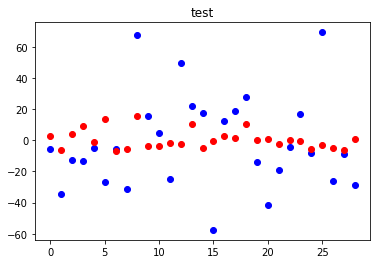

In [182]:
a = list(y_test['ISMR'])
b = list(preds)
plotGraph(a, b, "test")

In [184]:
data = {'Actual':a,'Predicted':b}
table = pd.DataFrame(data)
table.head()

,Actual,Predicted
0,-5.53155,2.699341
1,-34.46720,-6.371553
2,-12.62450,3.722047
3,-13.49940,8.962457
4,-4.88418,-1.156697


**Comparing RMSE Values, clearly a Delay of 5 months gives the best result. The data also reduces every time we try to make a prediction, so even a delay of 2 months gives satisfactory results. This clearly shows that the correlation of events happening in different parts of the world climatically has a delayed result on the Indian Monsoon as it should.**